# Exploratory Data Analysis (EDA) of Maarheeze-Eindhoven Dataset

This notebook presents an exploratory data analysis of a dataset related to events between Maarheeze and Eindhoven. The analysis includes basic data structure examination, summary statistics, missing value analysis, unique value exploration, and data visualization.


In [33]:
import pandas as pd

# Load the dataset
file_path = 'Maarheeze-Eindhoven.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,NL Site Number,File Start Date,File End Date,File Start Time,File End Time,File Severity,Average Length,File Duration,Hectometer Head,Hectometer Tail,Route Letter,Route Number,Route Description,Hectometering Direction,Trajectory From,Trajectory To,Cause Ground Detail,Route
0,3347248,2023-01-12,2023-01-12,07:30:28,09:45:05,1102808.0,8192000.0,"134,617",181.5,183.6,A,2,A2,descending,Maastricht,Eindhoven,Rush hour traffic jam (no cause reported),M-E
1,3347573,2023-01-12,2023-01-12,08:08:30,08:12:00,9273.0,2650000.0,"3,500",163.2,165.8,A,2,A2,descending,Maastricht,Eindhoven,Rush hour traffic jam (no cause reported),M-E
2,3348623,2023-01-12,2023-01-12,16:29:31,16:36:03,17240.0,2639000.0,"6,533",164.2,166.3,A,2,A2,descending,Maastricht,Eindhoven,Rush hour traffic jam (no cause reported),M-E
3,3350696,2023-01-16,2023-01-16,06:49:25,06:55:01,13518.0,2414000.0,"5,600",163.4,165.6,A,2,A2,descending,Maastricht,Eindhoven,Rush hour traffic jam (no cause reported),M-E
4,3350899,2023-01-16,2023-01-16,07:35:27,07:51:00,39717.0,2554000.0,"15,550",164.2,166.5,A,2,A2,descending,Maastricht,Eindhoven,Rush hour traffic jam (no cause reported),M-E


## Data Structure

First, let's examine the structure of the dataset, including the number of rows, columns, and the data types of each column.


In [34]:
# Checking the structure of the dataset
data_structure = {
    "Number of Rows": data.shape[0],
    "Number of Columns": data.shape[1],
    "Column Names": data.columns.tolist(),
    "Data Types": data.dtypes
}

data_structure


{'Number of Rows': 5451,
 'Number of Columns': 18,
 'Column Names': ['NL Site Number',
  'File Start Date',
  'File End Date',
  'File Start Time',
  'File End Time',
  'File Severity',
  'Average Length',
  'File Duration',
  'Hectometer Head',
  'Hectometer Tail',
  'Route Letter',
  'Route Number',
  'Route Description',
  'Hectometering Direction',
  'Trajectory From',
  'Trajectory To',
  'Cause Ground Detail',
  'Route'],
 'Data Types': NL Site Number               int64
 File Start Date             object
 File End Date               object
 File Start Time             object
 File End Time               object
 File Severity              float64
 Average Length             float64
 File Duration               object
 Hectometer Head            float64
 Hectometer Tail            float64
 Route Letter                object
 Route Number                 int64
 Route Description           object
 Hectometering Direction     object
 Trajectory From             object
 Trajectory To

## Summary Statistics and Missing Values

Next, we generate basic summary statistics for the numerical columns and check for any missing values in the dataset.


In [35]:
# Generating summary statistics for numerical columns
numerical_summary = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

numerical_summary, missing_values[missing_values > 0]  # Only showing columns with missing values


(       NL Site Number  File Severity  Average Length  Hectometer Head  \
 count    5.451000e+03   5.451000e+03    5.451000e+03      5451.000000   
 mean     3.565338e+06   4.011286e+04    2.824920e+06       168.110365   
 std      1.381124e+05   1.398468e+05    8.103108e+05         7.621434   
 min      3.301252e+06   0.000000e+00    0.000000e+00       139.700000   
 25%      3.454978e+06   5.320000e+03    2.253000e+06       163.700000   
 50%      3.576542e+06   1.047500e+04    2.600000e+06       164.400000   
 75%      3.677204e+06   2.861250e+04    3.154000e+06       175.800000   
 max      3.798399e+06   5.792292e+06    9.854000e+06       181.900000   
 
        Hectometer Tail  Route Number  
 count      5451.000000        5451.0  
 mean        170.895652           2.0  
 std           7.307937           0.0  
 min         155.200000           2.0  
 25%         166.200000           2.0  
 50%         166.800000           2.0  
 75%         178.400000           2.0  
 max        

## Unique Values in Categorical Columns

Understanding the diversity in categorical columns is essential. We will explore the unique values in some key categorical columns.


In [36]:
# Exploring unique values in certain categorical columns
unique_values = {
    "Trajectory From": data['Trajectory From'].unique(),
    "Trajectory To": data['Trajectory To'].unique(),
    "Cause Ground Detail": data['Cause Ground Detail'].unique(),

    "Route": data['Route'].unique()
}

unique_values


{'Trajectory From': array(['Maastricht', 'Eindhoven'], dtype=object),
 'Trajectory To': array(['Eindhoven', "'s-Hertogenbosch"], dtype=object),
 'Cause Ground Detail': array(['Rush hour traffic jam (no cause reported)', 'Cleanup operations',
        'Accident(s)', 'Traffic jam outside rush hour (no cause reported)',
        'Ongeval (met opruim/berging)',
        'Ongeval en (file buiten spits zonder oorzaak)',
        'Defective truck(s)', 'Politieactie',
        'Accident (in a rush hour traffic jam)',
        'Accident involving truck(s)',
        'Rush hour traffic jam (with accident)', 'Defective vehicle(s)',
        'Defect voertuig (object op de weg)',
        'Incident on connecting road', 'Veiligheidsincident',
        'Evenementen (en files buiten spits zonder oorzaak)',
        'Defecte vrachtwagen (met opruim/berging)',
        'Ongeval op aansluitende weg (met file zonder oorzaak)',
        'Accident on connecting road',
        'Ongeval op aansluitende weg (met spitsfile)

## Data Visualization

Visualizations will help us better understand the distribution and relationship of data in the dataset. We will create plots to visualize the distribution of events over months, frequency of different causes, and severity distribution.


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")



c:\Users\Stoyan\miniconda3\envs\SEM1-CB\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stoyan\miniconda3\envs\SEM1-CB\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stoyan\miniconda3\envs\SEM1-CB\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


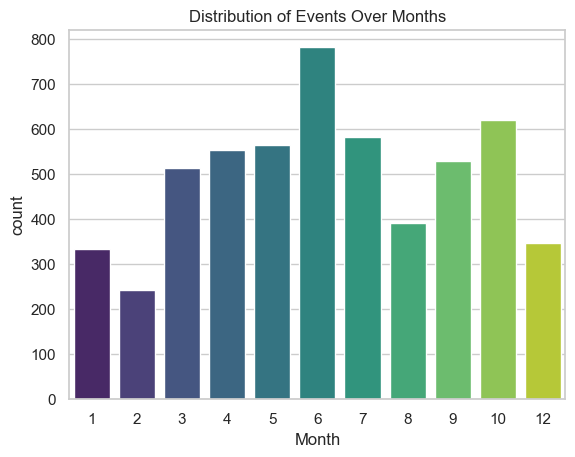

<Figure size 1500x500 with 0 Axes>

In [47]:
data['File End Date'] = pd.to_datetime(data['File End Date'], format='%Y-%m-%d')

# Extract the month and create a new column 'Month'
data['Month'] = data['File End Date'].dt.month


# Distribution of events over months
sns.countplot(x='Month', data=data, palette='viridis')
plt.title('Distribution of Events Over Months')

# Creating visualizations
plt.figure(figsize=(15, 5))


plt.tight_layout()
plt.show()




The bar chart illustrates the number of events that occurred in each month throughout a given year. The vertical axis represents the count of events, and the horizontal axis represents the months, labeled 1 through 12.

From the chart, we can observe the following:

- There is a noticeable variation in the number of events from month to month, that shows a possible seasonal pattern or variability in activity levels.
- The months at the beginning of the year, specifically January and February, show fewer events compared to most of the other months.
- The highest number of events occurs in the sixth month, June, which is due to increased activities during the summer or other seasonal factors.
- Following June, there is a decrease in the number of events, with the lowest point occurring in the ninth month, September.
- After September, there is a gradual increase in event counts, with a notable rise in the last month, December, which is associated with year-end activities or seasonal effects.



c:\Users\Stoyan\miniconda3\envs\SEM1-CB\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stoyan\miniconda3\envs\SEM1-CB\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stoyan\miniconda3\envs\SEM1-CB\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


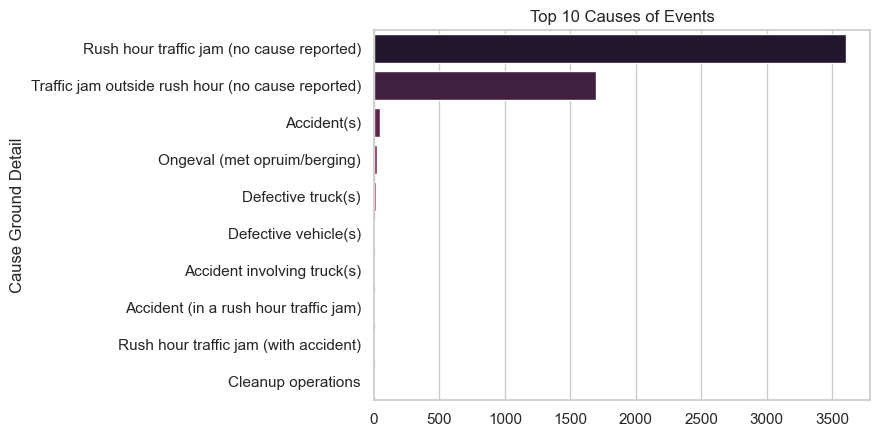

<Figure size 1500x500 with 0 Axes>

In [39]:
# Frequency of different causes (top 10)
top_causes = data['Cause Ground Detail'].value_counts().head(10)
sns.barplot(y=top_causes.index, x=top_causes.values, palette='rocket')
plt.title('Top 10 Causes of Events')

# Creating visualizations
plt.figure(figsize=(15, 5))


plt.tight_layout()
plt.show()


The horizontal bar chart outlines the most frequent causes for events within a dataset. The horizontal axis quantifies the frequency of each cause, while the vertical axis lists the causes.

The following observations can be made from the chart:

- The leading cause of events is 'Rush hour traffic jam (no cause reported)', indicating that congestion during peak travel times is a significant contributor to the number of events.
- The second most common cause is 'Traffic jam outside rush hour (no cause reported)', suggesting that traffic-related issues are prevalent even beyond traditional rush hours.
- 'Ongeval (met opruimingswerkzaamheden)', which translates to 'Accident (with cleanup operations)', ranks third, underscoring accidents associated with cleanup efforts as another primary factor in event causation.
- Other notable causes include vehicle-related issues such as 'Defective truck(s)' and 'Defective vehicle(s)', and incidents related to 'Roadwork' and 'Clearance operations'.
- The chart also highlights less frequent but notable causes such as 'Accident involving truck(s)' and 'Accident (in rush hour traffic jam)', which have a considerable impact despite their lower ranking.


## Time-Series Analysis

We will conduct a time-series analysis to observe trends and patterns over time. This includes analyzing the distribution of events across different months, time of the day, and the duration of these events.


In [49]:
# Converting date and time columns to datetime format and setting new datetime columns
data['File Start Date'] = pd.to_datetime(data['File Start Date'])
data['File End Date'] = pd.to_datetime(data['File End Date'])
data['Start DateTime'] = pd.to_datetime(data['File Start Date'].astype(str) + ' ' + data['File Start Time'])
data['End DateTime'] = pd.to_datetime(data['File End Date'].astype(str) + ' ' + data['File End Time'])

# Creating time-series visualizations
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

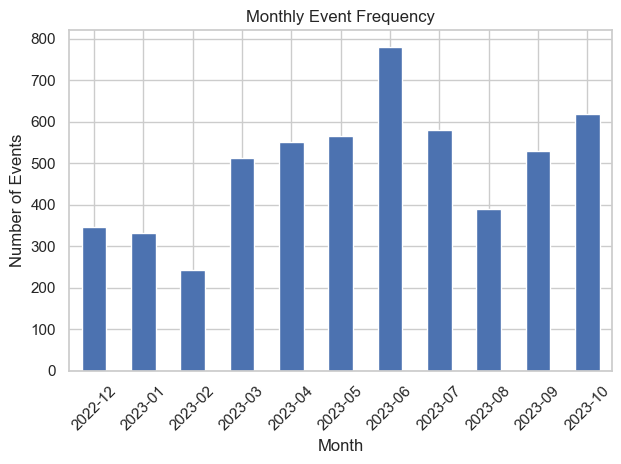

In [50]:
data.groupby(data['Start DateTime'].dt.to_period("M")).size().plot(kind='bar')
plt.title('Monthly Event Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)

# Apply tight layout to adjust the spacing
plt.tight_layout()

# Display the plot
plt.show()

#### Monthly Event Frequency Analysis

The bar chart displays the number of events recorded each month over a period. The x-axis represents the months of the year, labeled from December of the previous year (2022-12) to October of the current year (2023-10), and the y-axis indicates the count of events that occurred in each month.

Observations from the chart:

- The number of events starts at a moderate point in December, with a dip in January (2023-01).
- There is a steady increase in event frequency from February to June (2023-02 to 2023-06), suggesting a possible trend or seasonality in events.
- The highest peak occurs in June (2023-06), indicating the maximum frequency of events during this month.
- After June, there is a sharp decrease in July (2023-07), followed by a gradual decrease through to September (2023-09).
- There's a slight increase again in October (2023-10), indicating variability in event occurrences towards the end of the period displayed.



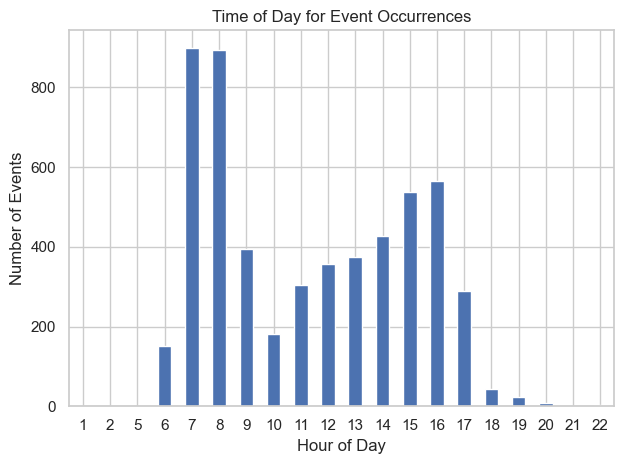

In [51]:
# Time of day patterns for event occurrences
data['Start DateTime'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.title('Time of Day for Event Occurrences')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Time of Day for Event Occurrences Analysis

This bar chart represents the distribution of events across different hours of the day. The x-axis denotes the hour of the day in 24-hour format, while the y-axis indicates the number of events occurring at each hour.

Observations from the chart include:

- A significant peak is observed at 8 AM, that shows a surge in events likely related to the beginning of the typical workday and school start times.
- A steady number of events are observed from 9 AM to 2 PM, which reflects ongoing daily activities.
- The next notable peak occurs at 3 PM, potentially correlating with the end of the school day or the beginning of the afternoon rush hour.
- Event occurrences appear to taper off after 3 PM, with a more pronounced decrease after 5 PM, reaching the lowest levels in the evening around 7 PM to 10 PM (22).




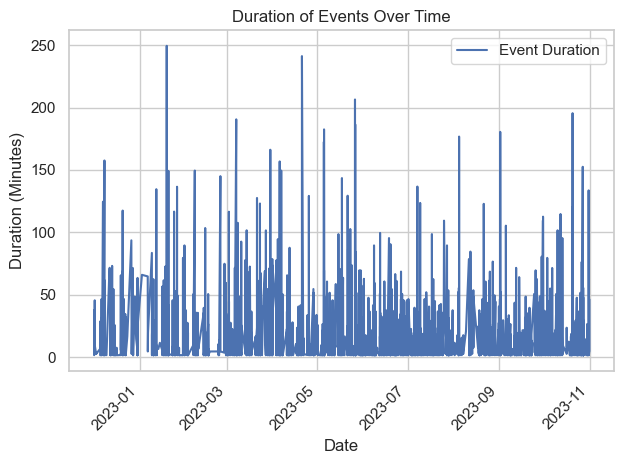

In [52]:
# Duration of events over time
data['Event Duration'] = (data['End DateTime'] - data['Start DateTime']).dt.total_seconds() / 60  # Duration in minutes
data.plot(x='Start DateTime', y='Event Duration', kind='line', ax=plt.gca())
plt.title('Duration of Events Over Time')
plt.xlabel('Date')
plt.ylabel('Duration (Minutes)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Duration of Events Over Time Analysis

The line chart depicts the duration of events over a span of time, specifically from January 2022 to January 2023. The x-axis represents the date, and the y-axis represents the duration of events in minutes.

Key observations from the chart:

- There is considerable variability in event durations throughout the year. Most events tend to have shorter durations, but there are several notable spikes indicating events of much longer duration.
- The longest events appear to occur sporadically rather than following a clear seasonal or monthly pattern. These outliers could be due to extraordinary circumstances or significant incidents requiring extended attention.
- There is no clear trend indicating an increase or decrease in event duration over time, suggesting that the factors affecting duration are varied and possibly unrelated to time of year.
- The data points are densely packed, which could suggest a consistent recording of events throughout the year with no significant periods of inactivity.


## Correlation and Categorical Analysis

Now, we'll conduct a correlation analysis among numerical variables and explore the relationships between categorical variables and other key metrics like event severity and duration.


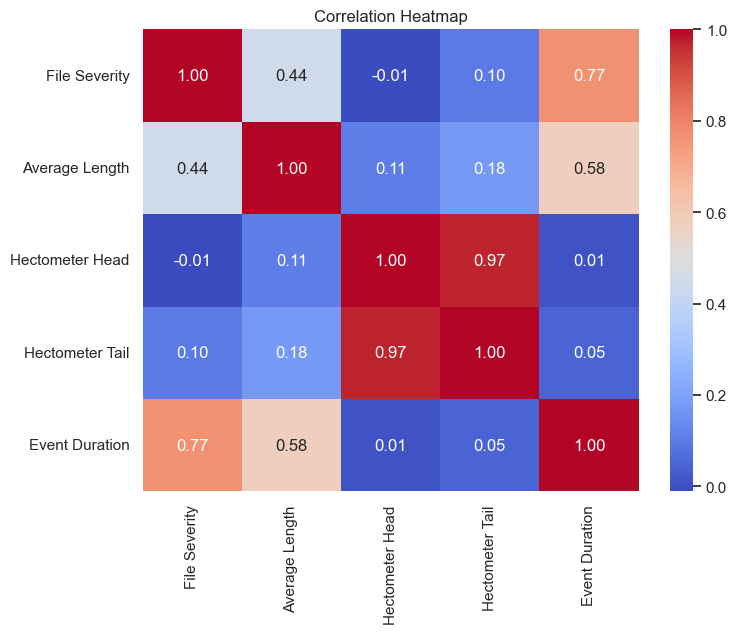

In [30]:
# Correlation Analysis among numerical variables
numerical_data = data[['File Severity', 'Average Length', 'Hectometer Head', 'Hectometer Tail', 'Event Duration']]

# Calculating correlation
corr = numerical_data.corr()

# Creating a heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()




## Correlation Heatmap Analysis

The correlation heatmap provides a visual summary of the relationships between different numerical variables in the dataset. Each cell in the heatmap shows the correlation coefficient between two variables, with the scale on the right indicating the strength of the relationship, ranging from -1 (indicating a perfect negative correlation) to 1 (indicating a perfect positive correlation).

Key observations from the heatmap:

- **File Severity and Event Duration**: There is a strong positive correlation (0.77) between 'File Severity' and 'Event Duration', suggesting that events with greater severity tend to last longer.
- **Hectometer Head and Hectometer Tail**: These two variables display a very strong positive correlation (0.97), indicating that as the hectometer head position increases, the tail position tends to increase as well, which is logical since they are related to the same stretch of road.
- **Average Length and File Severity**: 'Average Length' shows a moderate positive correlation with 'File Severity' (0.44), implying that longer events are associated with higher severity.
- **Weak Correlations**: Several pairs of variables, such as 'Hectometer Head' with 'File Severity' and 'Hectometer Tail' with 'Event Duration', show very weak correlations (close to 0), indicating a negligible linear relationship between these variables.

The heatmap highlights important relationships that could be investigated further to understand the underlying patterns and causes of the events.


Now we will go more in-depth and look how different 'Cause Ground Detail' categories impact the 'File Severity' and 'Event Duration'. 

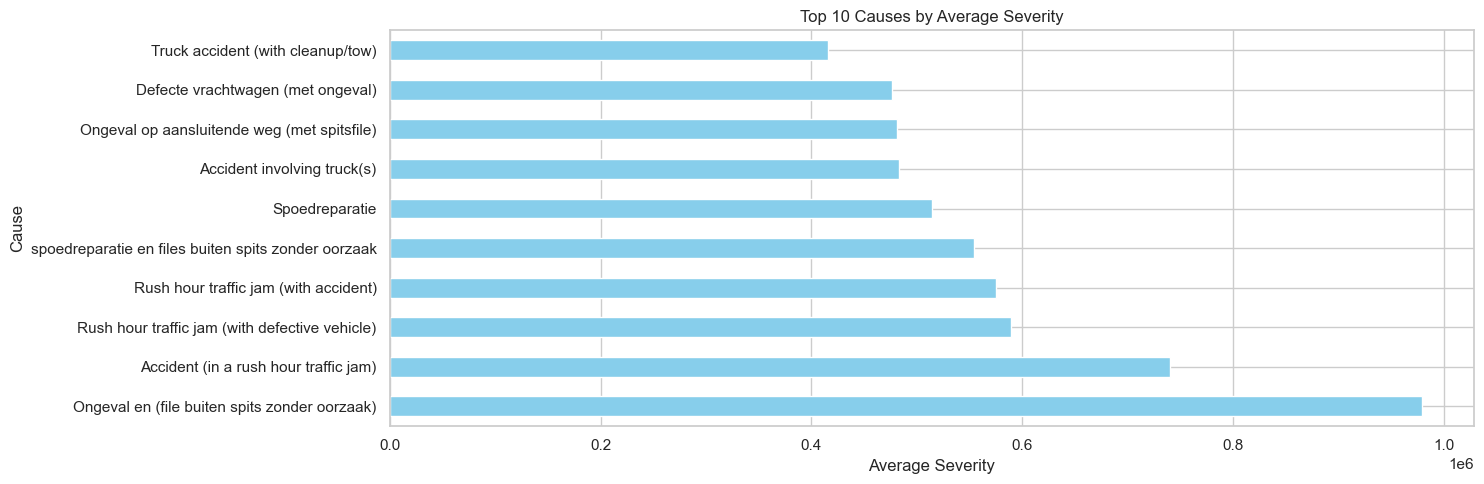

In [54]:
# In-depth analysis of categorical variables
# Analyzing the impact of 'Cause Ground Detail' on 'File Severity' and 'Event Duration'
cause_severity = data.groupby('Cause Ground Detail')['File Severity'].mean().sort_values(ascending=False)
cause_duration = data.groupby('Cause Ground Detail')['Event Duration'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 5))

# Impact on File Severity
cause_severity.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Causes by Average Severity')
plt.xlabel('Average Severity')
plt.ylabel('Cause')

plt.tight_layout()
plt.show()



#### Analysis of Top 10 Causes by Average Severity

The horizontal bar chart lists the top 10 causes of events, ranked by their average severity. The severity is represented on the horizontal axis, with each bar's length representing the average severity score for each cause, and the causes listed on the vertical axis.

Key observations from the chart:

- The most severe cause appears to be 'Truck accident (with cleanup/tow)', indicating that events involving truck accidents requiring cleanup or towing operations are associated with the highest severity on average.
- Other notable high-severity causes include 'Defecte vrachtwagen (met ongeval)' and 'Ongeval op aansluitende weg (met spitsfile)', which translate to 'Defective truck (with accident)' and 'Accident on connecting road (with traffic jam)', respectively. These suggest that incidents involving vehicles, especially trucks, and those that occur in conjunction with traffic jams are particularly severe.
- Causes related to rush hour, whether involving accidents or defective vehicles, are also ranked high in terms of average severity, emphasizing the impact of rush hour conditions on event severity.
- The cause 'Spoedreparatie en files buiten spits zonder oorzaak', translating to 'Emergency repairs and traffic jams outside rush hour without cause', while not the most severe, is still significant enough to rank among the top causes.



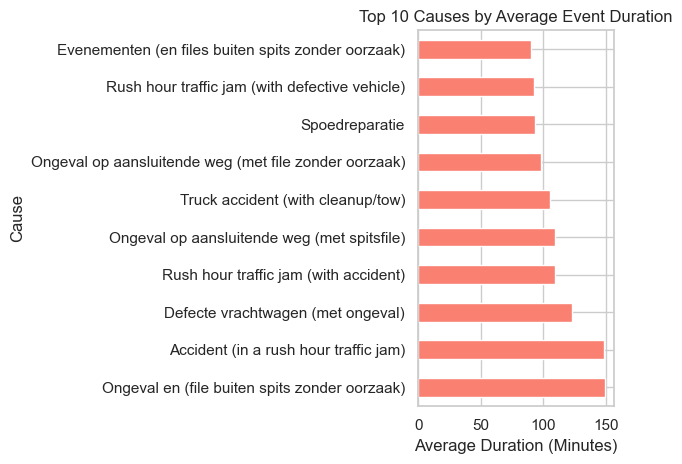

In [32]:
# Impact on Event Duration
cause_duration.head(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Causes by Average Event Duration')
plt.xlabel('Average Duration (Minutes)')
plt.ylabel('Cause')

plt.tight_layout()
plt.show()

#### Analysis of Top 10 Causes by Average Event Duration

This horizontal bar chart depicts the average duration, in minutes, of events attributed to various causes. The x-axis quantifies the average duration, while the y-axis lists the causes of events.

Observations from the chart include:

- 'Ongeval en (file buiten spits zonder oorzaak)' which translates to 'Accident and (traffic jam outside rush hour without cause)' has the highest average duration, suggesting that these incidents tend to last significantly longer than those related to other causes.
- 'Accident (in a rush hour traffic jam)' and 'Defecte vrachtwagen (met ongeval)' or 'Defective truck (with accident)' follow as the second and third leading causes of prolonged event durations, respectively.
- Other causes such as 'Rush hour traffic jam (with defective vehicle)', 'Spoedreparatie' or 'Emergency repairs', and 'Ongeval op aansluitende weg (met spitsfile)' or 'Accident on connecting road (with traffic jam)' also contribute to longer event durations, though to a lesser extent than the top-ranking causes.
- Causes like 'Evenementen (en files buiten spits zonder oorzaak)' or 'Events (and traffic jam outside rush hour without cause)' have lower average durations among the top causes, indicating potentially quicker resolution times or less complexity in managing these events.
